In [ ]:
!git clone https://github.com/geneexpressionpolito/Transformers-for-gene-expression-prediction-from-raw-dna-sequences.git
!mv ./Transformers-for-gene-expression-prediction-from-raw-dna-sequences/Classes ./
!pip install import-ipynb
!gdown --folder 1u34ntvh4dL5Y5_hZSA9EDs5SZ32MPda1
import import_ipynb
import os

Mounted at /content/drive


In [ ]:
from Classes.DataManager import DataManager
from Classes.Transformer import projTransformer
from tensorflow import keras
import numpy as np

%load_ext tensorboard

importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/DataManager.ipynb
importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/Transformer.ipynb
Populating the interactive namespace from numpy and matplotlib
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
print("> Loading DataManager...")
dm = DataManager(DeepLncLoc = True)

print("> Loading train data...")
X_trainhalflife, X_trainpromoter, y_train, _                = dm.get_train()

print("> Loading validation data...")
X_validationhalflife, X_validationpromoter, y_validation, _ = dm.get_validation()

print("> Loading test data...")
X_testhalflife, X_testpromoter, y_test, _                   = dm.get_test()

print("\n**************\n     DONE\n**************\n")

> Loading DataManager...
> Loading train data...
> Loading validation data...
> Loading test data...

**************
     DONE
**************



data loading takes at most 30s, we can improve it saving the numerical representation of sequences

Preprocessing-> Padding

In [ ]:
maxlen=X_trainpromoter.shape[1]

(16358, 210, 64)
(1000, 210, 64)
(999, 210, 64)
210


INFO:tensorflow:Initializing the TPU system: grpc://10.50.204.34:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.50.204.34:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU')]
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


model built
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 210, 64)]    0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 210, 64)      256         input_1[0][0]                    
__________________________________________________________________________________________________
position_embedding2 (PositionEm (None, 210, 64)      0           batch_normalization[0][0]        
__________________________________________________________________________________________________
transformer_block (TransformerB (None, 210, 64)      116224      position_embedding2[0][0]        
__________________________________________________________________________________

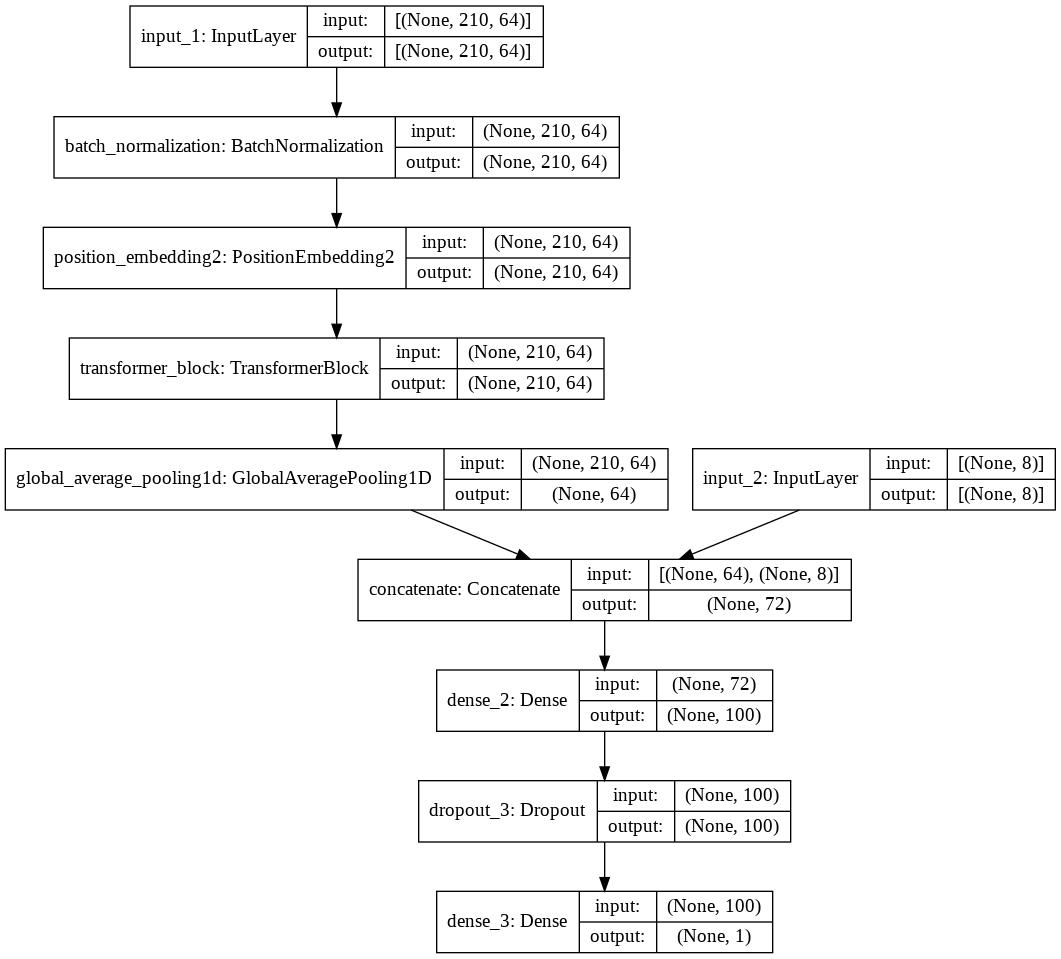


Parameters:
{'checkpoint_dir': 'batch128/', 'model_type': 'new_embedding', 'n_epochs': 500, 'batch_size': 256, 'learning_rate': 0.0005, 'momentum': 0.9, 'maxlen': 210, 'embed_dim': 64, 'num_heads': 4, 'ff_dim': 384, 'vocab_size': 5, 'dense': 100, 'dropout_rate': 0.1, 'lr_reduction_epoch': 200, 't_rate': 0.1, 'patience': 20, 'optimizer': 'Adam', 'warmup_steps': 4000, 'n_layers': 3, 'shuffle': True, 'logdir': None, 'loss': 'mse', 'history': '', 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7fc0eaa94c10>}



In [ ]:
model_type="new_embedding"
logdir = None
checkpoint_dir = "newEmbedTPU/"
loss = "mse"

######################################################################################################################
import tensorflow as tf
tf.keras.backend.clear_session()

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.experimental.TPUStrategy(resolver)


with strategy.scope():
    net = projTransformer(checkpoint_dir="batch128/",model_type=model_type, n_epochs=300, batch_size=256, 
                      learning_rate=5e-4, lr_reduction_epoch=None, maxlen=maxlen, embed_dim=64, num_heads=4, ff_dim=384, dense=100, 
                      dropout_rate=0.1, logdir=logdir, optimizer="Adam", warmup_steps=4_000, patience=20)
    
########################################################################################################################


Epoch 1/500

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
64/64 [==============================] - 14s 108ms/step - loss: 0.8698 - val_loss: 0.8389
Epoch 2/500

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
64/64 [==============================] - 1s 23ms/step - loss: 0.6578 - val_loss: 1.0618
Epoch 3/500

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
64/64 [==============================] - 1s 23ms/step - loss: 0.5935 - val_loss: 1.0893
Epoch 4/500

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
64/64 [==============================] - 1s 22ms/step - loss: 0.5586 - val_loss: 0.9834
Epoch 5/500

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
64/64 [==============================] - 1s 22ms/step - loss: 0.5230 - val_loss: 0.9489
Epoch 6/500

Epoch 00006: LearningRateScheduler reducing learning rate to

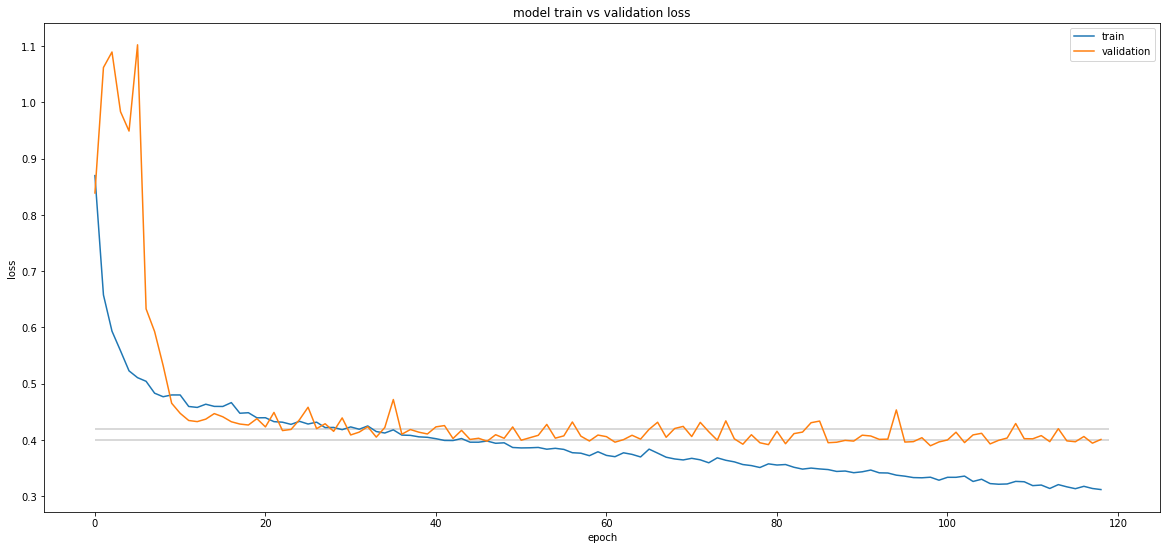

In [ ]:
net.train_model([X_trainpromoter, X_trainhalflife], y_train, [X_validationpromoter, X_validationhalflife], y_validation, True)

In [ ]:
net.evaluate([X_testpromoter, X_testhalflife], y_test)

Test R^2 = 0.614


In [ ]:
net.evaluate_best([X_testpromoter, X_testhalflife], y_test, True)

Test R^2 = 0.614


0.6135300790785381

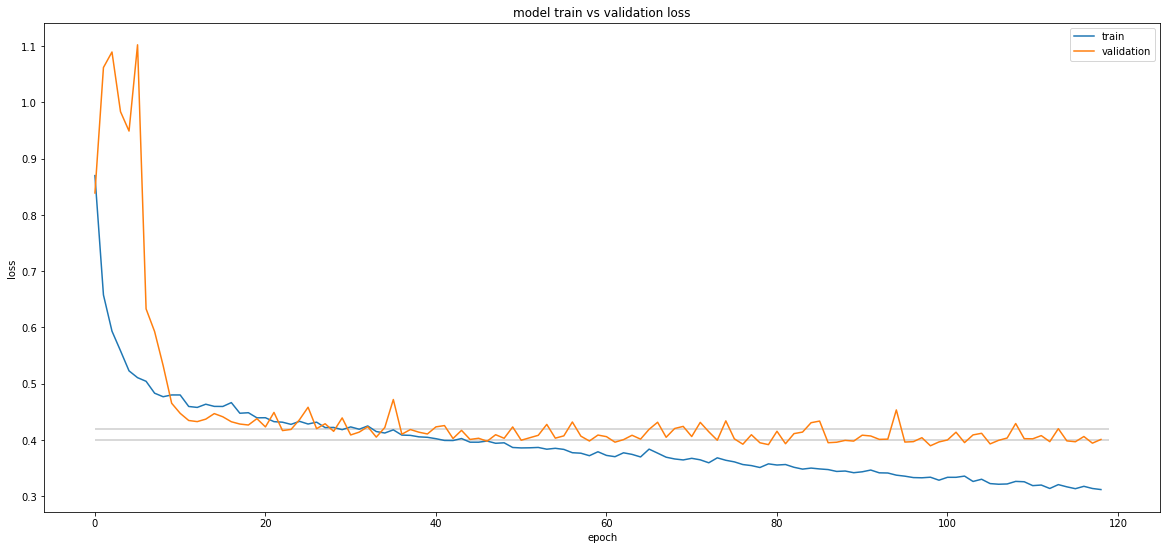

In [ ]:
net.plot_train()

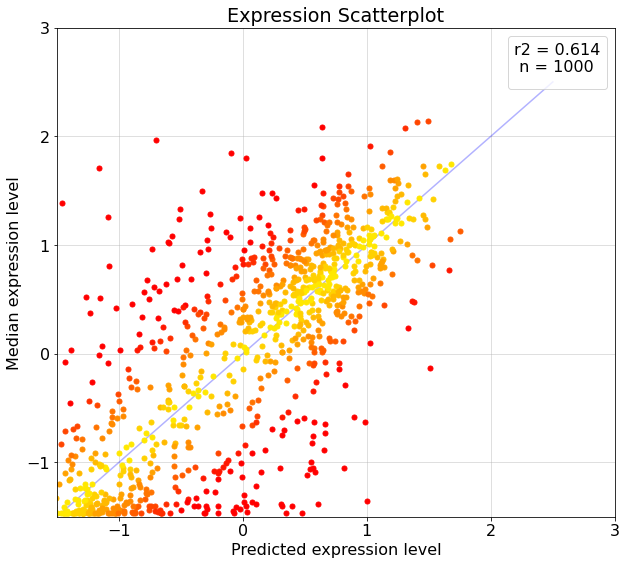

In [ ]:
net.plot_r2([X_testpromoter, X_testhalflife], y_test, True)

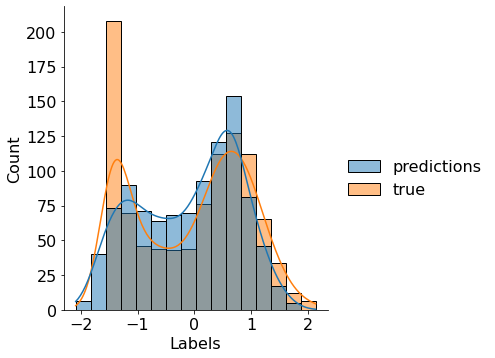

In [ ]:
net.plot_kde([X_testpromoter, X_testhalflife], y_test, True)